In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft, fftfreq
import allan_variance

Current idx is:  5000
Current idx is:  10000
Current idx is:  15000
Current idx is:  20000
Current idx is:  25000
Current idx is:  30000
Current idx is:  35000
Current idx is:  40000
Current idx is:  45000
Current idx is:  50000
Current idx is:  55000
Current idx is:  60000
Current idx is:  65000
Current idx is:  70000
Current idx is:  75000
Current idx is:  80000
Current idx is:  85000
Current idx is:  90000


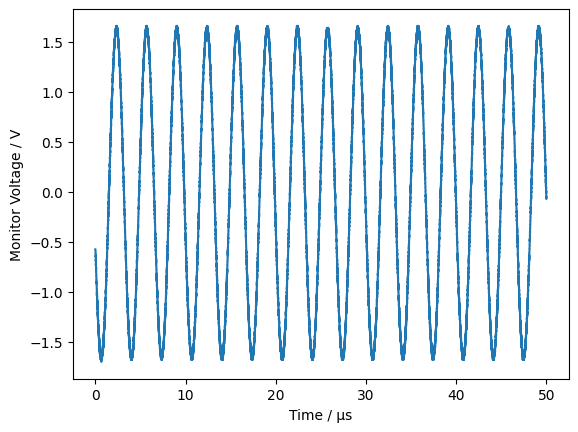

In [38]:
DATA = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\ShortTermStab.csv',skiprows = 2, delimiter = ',')
ts = DATA[:,0]-DATA[0,0]
V = DATA[:,1]
plt.plot(ts*1e6,V)
plt.xlabel('Time / µs')
plt.ylabel('Monitor Voltage / V')


def fitFunc(t,A,phi,w, D):
    return A * np.cos(w*t+phi) + D

windowStart = 0
windowEnd = windowStart + 3.33*1e-6

Amplitudes = []
centerTs = []

idxStart = 0
idxEnd = np.argmin(np.abs(ts-3.33*1e-6))
while idxEnd < len(ts)-1:
    windowedT = ts[idxStart:idxEnd]
    windowedV = V[idxStart:idxEnd]
    idxStart+=10
    idxEnd+=10
    popt,pcov = curve_fit(fitFunc,windowedT,windowedV,p0 = [1.6,0,2*np.pi*300*1e3, 0])
    Amplitudes.append(popt[0])
    centerTs.append((windowedT[0]+windowedT[-1])/2)
    sigma = np.sqrt(pcov[0,0])
    if idxStart % 5000 == 0:
        print('Current idx is: ', idxStart)


0.0002505603879209321


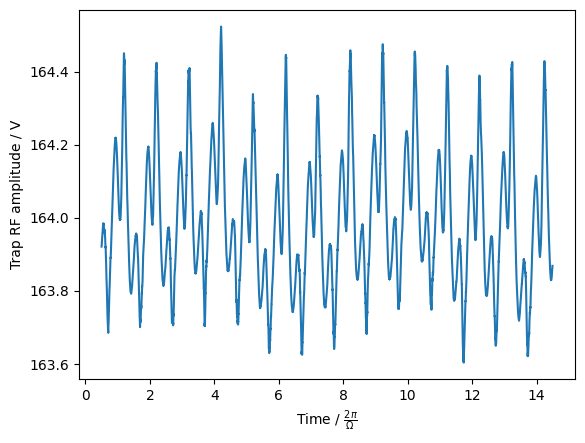

In [39]:
centerTs= np.array(centerTs)
Amplitudes= np.array(Amplitudes)
plt.plot(centerTs/(3.334*1e-6),Amplitudes*100)
print()
plt.xlabel(r'Time / $\frac{2\pi}{\Omega}$')
plt.ylabel(r'Trap RF amplitude / V')
print(sigma)

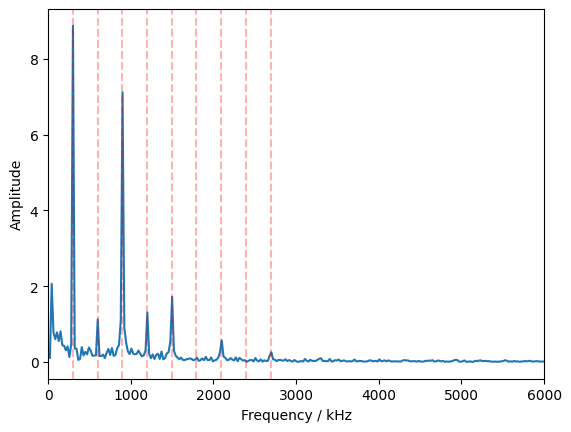

In [40]:
T = np.diff(centerTs)[0]
yf = fft(Amplitudes)
xf = fftfreq(len(centerTs),T)[:len(centerTs)//2]
plt.plot(xf[xf>100]*1e-3,np.abs((yf[:len(centerTs)//2])[xf>100]))
plt.xlim(0,6*1e3)
plt.xlabel('Frequency / kHz')
plt.ylabel('Amplitude')
for j in range(9):
    order = j+1
    plt.axvline(299*order,ymin = 0, ymax = 9, color = 'r', ls = '--',alpha = 0.3)



In [41]:
tau, avar = allan_variance.compute_avar(Amplitudes*100, dt = np.diff(centerTs)[0])

Text(0.5, 0, '$\\tau$ / $T_{RF}$')

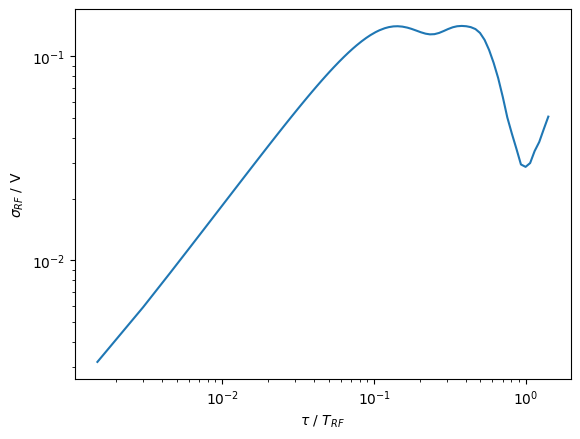

In [42]:
plt.plot(tau/(3.33*1e-6),np.sqrt(avar))
plt.semilogx()
plt.semilogy()
plt.ylabel(r'$\sigma_{RF}$ / V')
plt.xlabel(r'$\tau$ / $T_{RF}$')